# Exercise: Build a simple logistic regression model

In this exercise, we'll fit a simple logistic regression model that will try to predict the chance of an avalanche. 

Recall that logistic regression fits an s-shaped curve to data, rather than a straight line, and we can use this to calculate a probability of a binary outcome.

## Data visualization

Let's start this exercise by loading in and having a look at our data:

In [1]:
import pandas
#!pip install statsmodels
#!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
#!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/avalanche.csv

#Import the data from the .csv file
url = "https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/avalanche.csv"
dataset = pandas.read_csv(url, delimiter="\t")

#Let's have a look at the data
dataset

,Unnamed: 0,avalanche,no_visitors,surface_hoar,fresh_thickness,wind,weak_layers,tracked_out
0,0,0,4,3.900508,8.715485,6,9,0
1,1,0,9,1.477586,6.801417,30,0,0
2,2,1,3,3.236594,5.632457,8,8,1
3,3,0,0,3.244283,9.348871,12,10,0
4,4,1,2,5.196741,3.782315,4,9,1
...,...,...,...,...,...,...,...,...
1090,1090,1,1,2.182905,6.109184,3,9,0
1091,1091,0,2,3.718231,10.426100,28,0,0
1092,1092,1,8,7.037647,9.741006,34,3,0
1093,1093,0,2,2.449889,7.337579,37,10,1


## Data Exploration

The `avalanche` field is our target. A value of `1` means that an avalanche did occur at the conditions described by the features, whereas a value of `0` means no avalanche happened. Because our targets can only be `0` or `1`, we call this a *binary classification* model.

Now, let's plot the relationships between each feature and the target values. That helps us understand which features are more likely to influence the results:

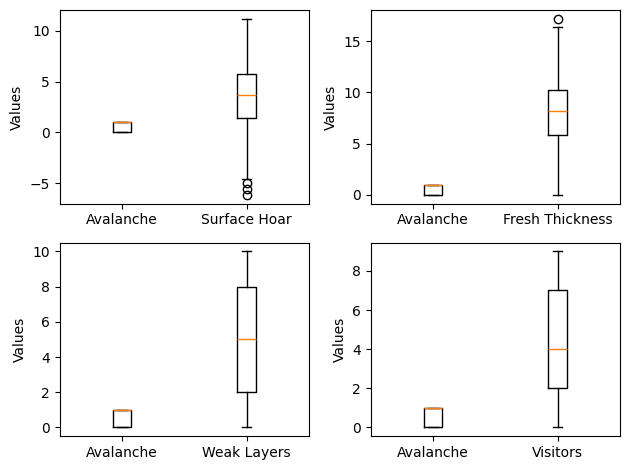

In [2]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(2, 2)

# Create box plots
axs[0, 0].boxplot([dataset["avalanche"], dataset["surface_hoar"]])
axs[0, 0].set_xticklabels(['Avalanche', 'Surface Hoar'])
axs[0, 0].set_ylabel('Values')

axs[0, 1].boxplot([dataset["avalanche"], dataset["fresh_thickness"]])
axs[0, 1].set_xticklabels(['Avalanche', 'Fresh Thickness'])
axs[0, 1].set_ylabel('Values')

axs[1, 0].boxplot([dataset["avalanche"], dataset["weak_layers"]])
axs[1, 0].set_xticklabels(['Avalanche', 'Weak Layers'])
axs[1, 0].set_ylabel('Values')

axs[1, 1].boxplot([dataset["avalanche"], dataset["no_visitors"]])
axs[1, 1].set_xticklabels(['Avalanche', 'Visitors'])
axs[1, 1].set_ylabel('Values')

plt.tight_layout()

plt.show()

We can notice that:

- For `fresh_thickness` the outcomes are very similar. This means that variations in their values aren't strongly correlated with the results.

- Variations in values for `weak_layers` and `no_visitors` seem to correlate with a larger number of `avalanche` results, and thus we should assign more importance to these features.

The differences between avalanche and non-avalanche days are small, and there isn't one clear driver of issues. Weak layers looks like a good starting point because it's related to the widest variation in results.

## Building a simple logistic regression model

We will now build and train a model to predict the chance of an avalanche happening based __solely__ on the number of weak layers of snow:

In [3]:
# Here we import a function that splits datasets according to a given ratio
from sklearn.model_selection import train_test_split

# Split the dataset in an 70/30 train/test ratio. 
train, test = train_test_split(dataset, test_size=0.3, random_state=2)
print(train.shape)
print(test.shape)

(766, 8)
(329, 8)


OK, lets train our model, using the `train` dataset we've just created (notice that `weak_layers` will be the only feature used to determine the outcome):

In [4]:
import statsmodels.formula.api as smf

# Perform logistic regression.
model = smf.logit("avalanche ~ weak_layers", train).fit()

print("Model trained")

Optimization terminated successfully.
         Current function value: 0.631451
         Iterations 5
Model trained


After training, we can print a model summary with very detailed information:

In [5]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:              avalanche   No. Observations:                  766
Model:                          Logit   Df Residuals:                      764
Method:                           MLE   Df Model:                            1
Date:                Tue, 02 Sep 2025   Pseudo R-squ.:                 0.07898
Time:                        16:05:44   Log-Likelihood:                -483.69
converged:                       True   LL-Null:                       -525.17
Covariance Type:            nonrobust   LLR p-value:                 8.395e-20
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.8586      0.147     -5.856      0.000      -1.146      -0.571
weak_layers     0.2241      0.026      8.648      0.000       0.173       0.275


Notice that the positive coefficient for `weak_layers` means that a higher value indicates a higher likelihood for an avalanche.


## Using our model

We can now use our trained model to make predictions and estimate probabilities.

Let's pick the first four occurrences in our `test` set and print the probability of an avalanche for each one of them:

In [6]:
# predict to get a probability

# get first 3 samples from dataset
samples = test["weak_layers"][:4]

# use the model to get predictions as possibilities
estimated_probabilities = model.predict(samples)

# Print results for each sample
for sample, pred in zip(samples,estimated_probabilities):
    print(f"A weak_layer with value {sample} yields a {pred * 100:.2f}% chance of an avalanche.")


A weak_layer with value 5 yields a 56.51% chance of an avalanche.
A weak_layer with value 4 yields a 50.95% chance of an avalanche.
A weak_layer with value 7 yields a 67.05% chance of an avalanche.
A weak_layer with value 0 yields a 29.76% chance of an avalanche.


Let's plot out model to understand this:

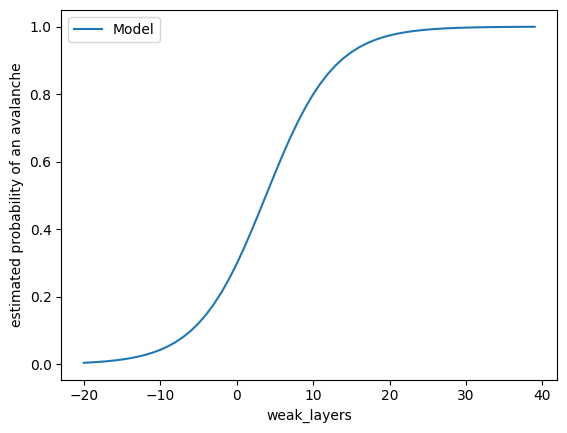

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

predict = lambda x: model.predict(pd.DataFrame({"weak_layers": x}))

# Generate x values
x_values = range(-20, 40)
y_values = predict(x_values)

# Create the plot
plt.plot(x_values, y_values, label="Model")

# Add labels
plt.xlabel("weak_layers")
plt.ylabel("estimated probability of an avalanche")
plt.legend()

plt.show()

The line plots the function of the __probability__ of an avalanche over the number of weak layers; Notice that the more weak layers, the more likely an avalanche will happen. This plot can look a bit confusing for two reasons.

Firstly, the curve can make predictions from negative to positive infinity, but we only have data for 0 - 10 layers:

In [8]:
print("Minimum number of weak layers:", min(train.weak_layers))
print("Maximum number of weak layers:", max(train.weak_layers))

Minimum number of weak layers: 0
Maximum number of weak layers: 10


This is because logistic regression models allow predictions outside the range of values they have seen, and sometimes do so quite well.

The second reason the plot is confusing is that at 0 layers, there's still _some_ risk of an avalanche. Similarly, at 10 layers, there isn't a 100% risk of an avalanche. This is actually in line with the data:

In [9]:
import numpy as np

# Get actual rates of avalanches at 0 layers
avalanche_outcomes_for_0_layers = train[train.weak_layers == 0].avalanche
print("Average rate of avalanches for 0 weak layers of snow", np.average(avalanche_outcomes_for_0_layers))

# Get actual rates of avalanches at 10 layers
avalanche_outcomes_for_10_layers = train[train.weak_layers == 10].avalanche
print("Average rate of avalanches for 10 weak layers of snow", np.average(avalanche_outcomes_for_10_layers))

Average rate of avalanches for 0 weak layers of snow 0.3880597014925373
Average rate of avalanches for 10 weak layers of snow 0.7761194029850746


Our model is actually doing a good job! It's just that avalanches aren't _only_ caused by weak layers of snow. If we want to do better, we probably need to think about including other information in the model.

## Classification or decision thresholds
To return a binary category (`True` = "avalanche", `False` = "no avalanche") we need to define a *Classification Threshold* value. Any probability above that threshold is returned as the positive category, whereas values below it will be returned as the negative category.

Let's see what happens if set our threshold to `0.5` (meaning that our model will return `True` whenever it calculates a chance above 50% of an avalanche happening):

In [10]:
# threshold to get an absolute value
threshold = 0.5

# Add classification to the samples we used before
for sample, pred in list(zip(samples,estimated_probabilities)):
    print(f"A weak_layer with value {sample} yields a chance of {pred * 100:.2f}% of an avalanche. Classification = {pred > threshold}")



A weak_layer with value 5 yields a chance of 56.51% of an avalanche. Classification = True
A weak_layer with value 4 yields a chance of 50.95% of an avalanche. Classification = True
A weak_layer with value 7 yields a chance of 67.05% of an avalanche. Classification = True
A weak_layer with value 0 yields a chance of 29.76% of an avalanche. Classification = False


Note that a `0.5` threshold is just a starting point that needs to be tuned depending on the data we're trying to classify.

## Performance on test set
Now let's use our `test` dataset to perform a quick evaluation on how the model did. For now, we'll just look at how often we correctly predicted if there would be an avalanche or not

In [11]:
# Classify the mdel predictions using the threshold
predictions = model.predict(test) > threshold

# Compare the predictions to the actual outcomes in the dataset
accuracy = np.average(predictions == test.avalanche)

# Print the evaluation
print(f"The model correctly predicted outcomes {accuracy * 100:.2f}% of time.")

The model correctly predicted outcomes 65.05% of time.


Avalanches are hard to predict, but we're doing ok. It's hard to tell exactly what kind of mistakes our model is making, though. We'll focus on this in the next exercise.

## Summary

In this unit, we covered the following topics:
 - Using Data Exploration to understand which features have a stronger correlation to the outcomes
 - Building a simple Logistic Regression model
 - Using the trained model to predict _probabilities_
 - Using *thresholds* to map probabilities to binary classes
 - How to use a test set to measure the model's performance
